In [129]:
import numpy as np
import pandas as pd

In [130]:
import chardet

# Detect the encoding
with open('spam.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']
    print(encoding)

# Use the detected encoding to read the file
df = pd.read_csv('spam.csv', encoding=encoding)


Windows-1252


In [131]:
df.sample(5)
df.shape

(5572, 5)

In [132]:
#drop last 3 columns becouze it has no use 

df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [133]:
df.sample(5)


,v1,v2
3181,ham,"My Parents, My Kidz, My Friends n My Colleague..."
5357,ham,Ok
4199,ham,I will come tomorrow di
3315,ham,I know girls always safe and selfish know i go...
527,ham,Yes! How is a pretty lady like you single?


In [134]:
# renaming the remained 2 columns

df.rename(columns={'v1': 'Value','v2':'Message'},inplace=True)

In [135]:
df.sample(5)

,Value,Message
1114,ham,No no:)this is kallis home ground.amla home to...
1432,ham,Thanks for ve lovely wisheds. You rock
2073,spam,FreeMsg: Claim ur 250 SMS messages-Text OK to ...
741,ham,Do well :)all will for little time. Thing of g...
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...


In [136]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()


In [137]:
df['Value'] = encoder.fit_transform(df['Value'])

In [138]:
df.head()

,Value,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
#  cheacking missing values

df.isnull().sum()

Value      0
Message    0
dtype: int64

In [140]:
# check for duplicate values

df.duplicated().sum()

403

In [141]:
df = df.drop_duplicates(keep='first')

In [142]:
df.duplicated().sum()

0

In [143]:
df.shape

(5169, 2)

2. EDA

In [144]:
df.head()

,Value,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
df['Value'].value_counts()

Value
0    4516
1     653
Name: count, dtype: int64

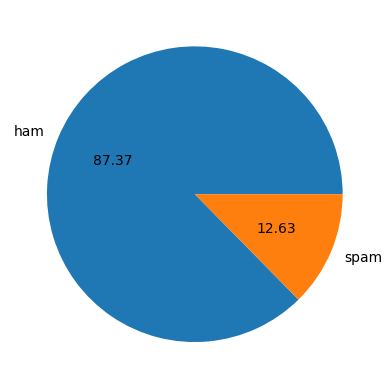

In [146]:
import matplotlib.pyplot as plt
plt.pie(df['Value'].value_counts(), labels=['ham','spam'],autopct= "%0.2f")
plt.show()

In [147]:
##after showing this we say data is imbalance

In [148]:
import nltk

In [149]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WWD_5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WWD_5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
df['num_char'] = df['Message'].apply(len)

In [151]:
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [152]:
df.head()

,Value,Message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [153]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [154]:
df.head()

,Value,Message,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [155]:
#describe messages for ham

df[df['Value'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [156]:
#describe messages for sham

df[df['Value'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [157]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

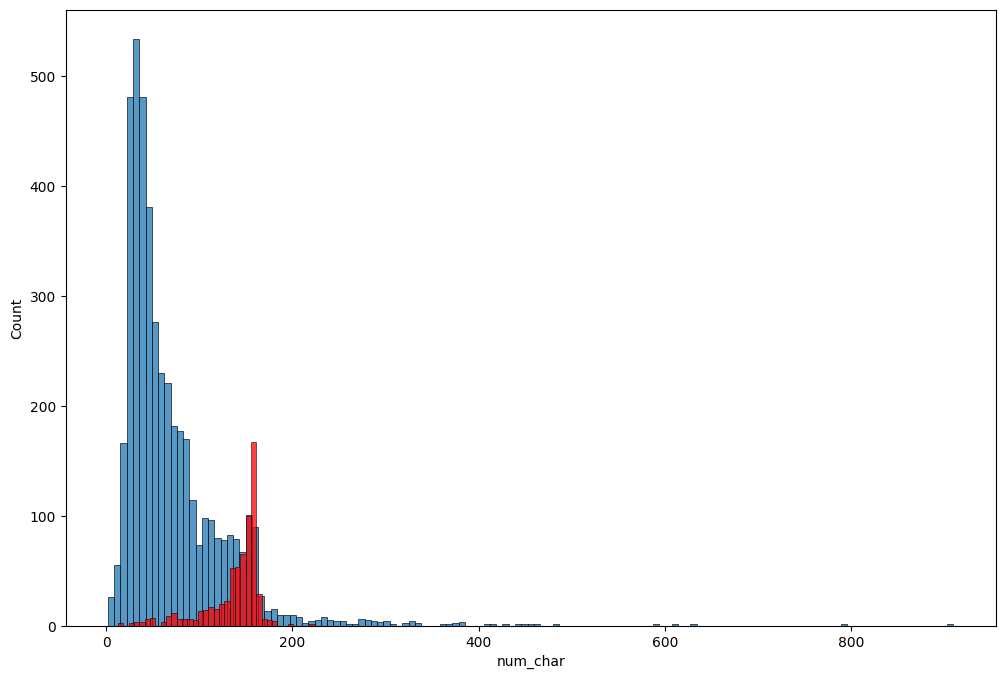

In [158]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Value'] == 0]['num_char'])
sns.histplot(df[df['Value'] == 1]['num_char'],color = 'red')

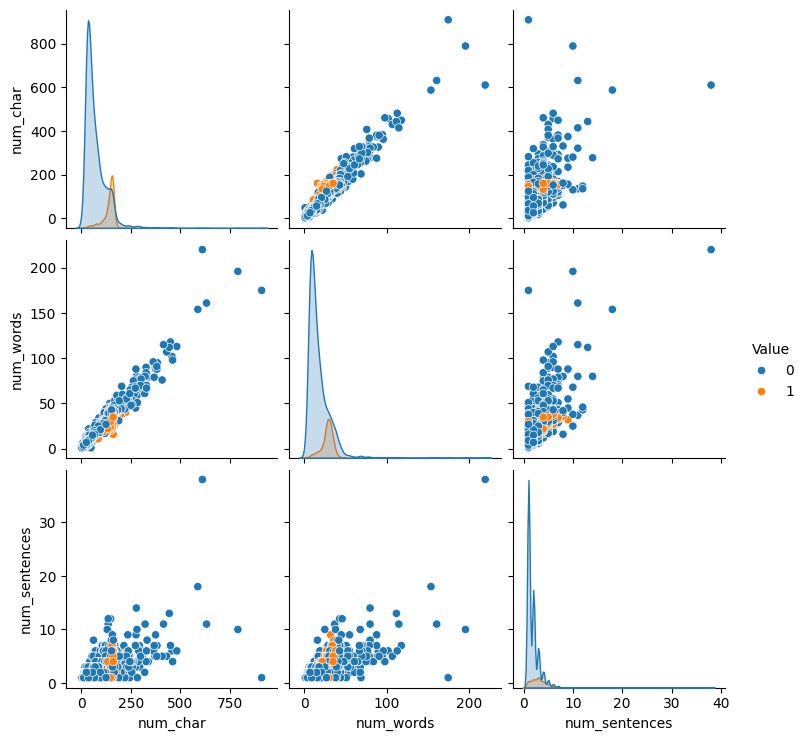

In [159]:
sns.pairplot(df,hue='Value')

In [160]:
# Cell 1: Import necessary libraries and download NLTK data
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WWD_5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WWD_5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:
from nltk.stem.porter import PorterStemmer
ps =  PorterStemmer()

In [162]:
def transform_text(text):
    text =  text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    
    text = y[:]
    y.clear()


    for i in text:
        y.append(ps.stem(i))


    
    return " ".join(y)

In [163]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [164]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [165]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [166]:
from nltk.stem.porter import PorterStemmer
ps =  PorterStemmer()
ps.stem('Loving')

'love'

In [167]:
df['Transformed_Msg'] = df['Message'].apply(transform_text)

In [168]:
df.head()

,Value,Message,num_char,num_words,num_sentences,Transformed_Msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [169]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [170]:
spam_wc = wc.generate(df[df['Value'] == 1]['Transformed_Msg'].str.cat(sep=" "))

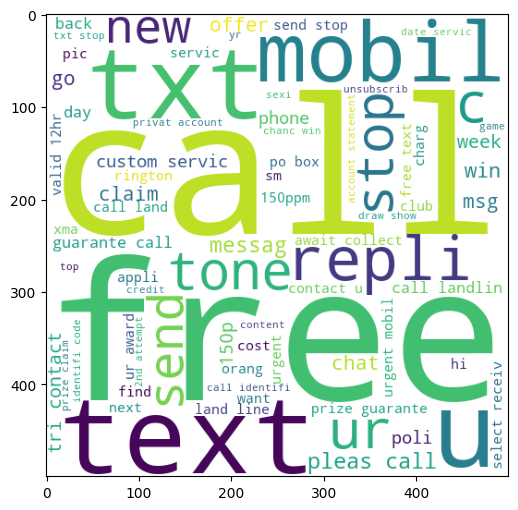

In [171]:
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

In [172]:
Norm_wc = wc.generate(df[df['Value'] == 0]['Transformed_Msg'].str.cat(sep=" "))

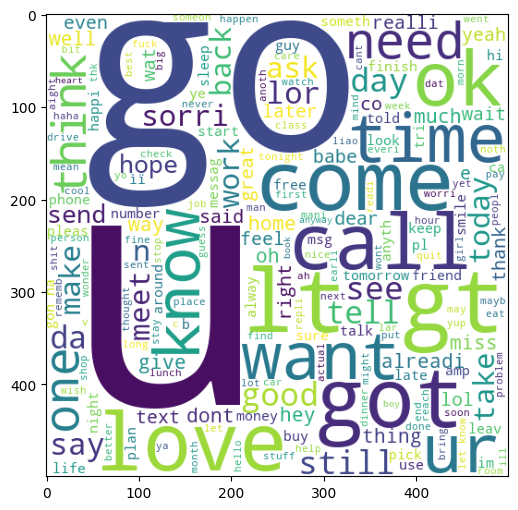

In [173]:
plt.figure(figsize=(20,6))
plt.imshow(Norm_wc)

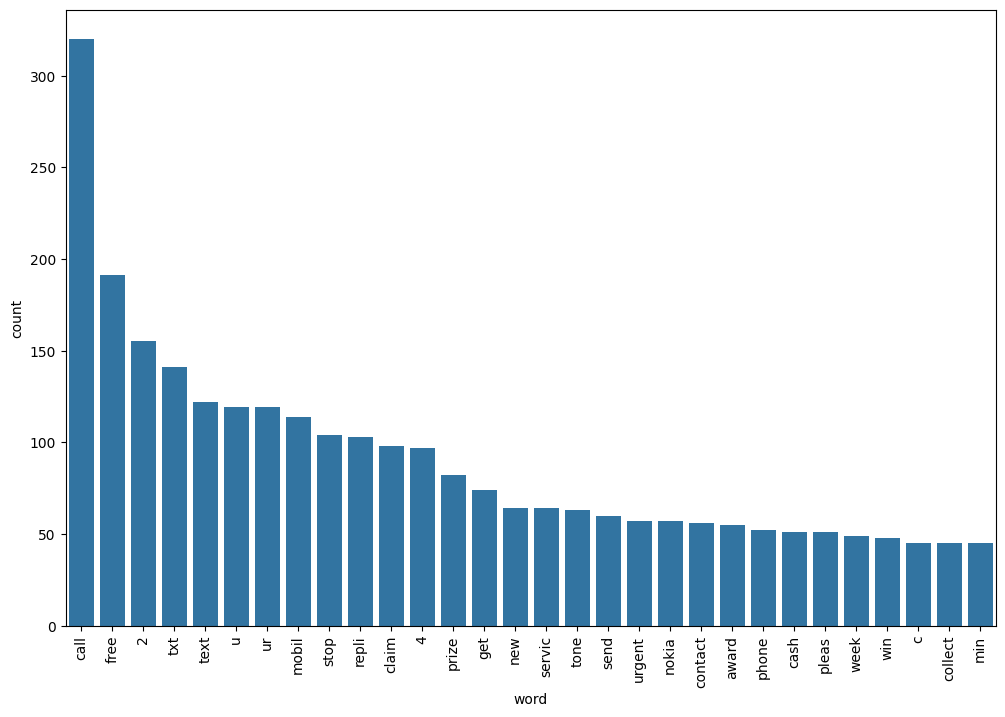

In [174]:
from collections import Counter

spam_corpus = []
for msg in df[df['Value'] == 1]['Transformed_Msg'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

word_counts = Counter(spam_corpus).most_common(30)
common_words_df = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation=90)
plt.show()

In [175]:
len(spam_corpus)

9939

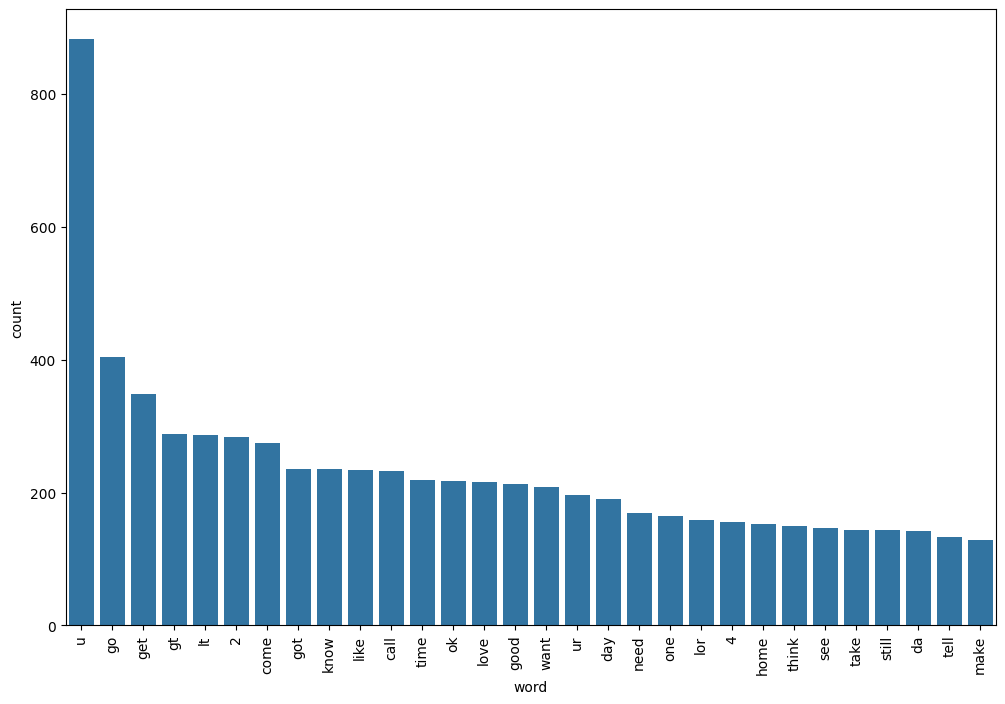

In [176]:
from collections import Counter

ham_corpus = []
for msg in df[df['Value'] == 0]['Transformed_Msg'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

word_counts = Counter(ham_corpus).most_common(30)
common_words_df = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation=90)
plt.show()

4. Model Building


In [177]:
df.head()

,Value,Message,num_char,num_words,num_sentences,Transformed_Msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [178]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#cv =  CountVectorizer()
tfidf = TfidfVectorizer()

In [179]:
X = tfidf.fit_transform(df['Transformed_Msg']).toarray()

In [180]:
X.shape

(5169, 6708)

In [181]:
Y = df['Value'].values

In [182]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train, x_test,y_train, y_test =  train_test_split(X,Y,test_size=0.2, random_state=2)

In [185]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [186]:
gnb =  GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Gussian as option


In [187]:
'''gnb.fit(x_train,y_train)
y_pred1 =  gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))'''

'gnb.fit(x_train,y_train)\ny_pred1 =  gnb.predict(x_test)\nprint(accuracy_score(y_test,y_pred1))\nprint(confusion_matrix(y_test,y_pred1))\nprint(precision_score(y_test,y_pred1))'

multinomial distibution we have choose becouse of presion score

In [188]:
mnb.fit(x_train,y_train)
y_pred2 =  mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


Bernomial distribution for option


In [189]:
'''bnb.fit(x_train,y_train)
y_pred3 =  bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))'''

'bnb.fit(x_train,y_train)\ny_pred3 =  bnb.predict(x_test)\nprint(accuracy_score(y_test,y_pred3))\nprint(confusion_matrix(y_test,y_pred3))\nprint(precision_score(y_test,y_pred3))'

In [190]:
#we have chose tfidf with mnb later

In [191]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

In [192]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
